Irei utilizar a lib scikit-image para tratar a imagem

testanto alguns codigos da documentação para testar a biblioteca.

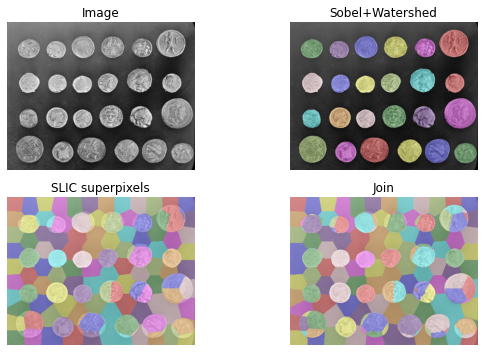

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations, watershed
from skimage.color import label2rgb
from skimage import data

coins = data.coins()

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# Make segmentation using SLIC superpixels.
seg2 = slic(coins, n_segments=117, max_num_iter=160, sigma=1, compactness=0.75,
            channel_axis=None, start_label=0)

# Combine the two.
segj = join_segmentations(seg1, seg2)

# Show the segmentations.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Image')

color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=coins, image_alpha=0.5, bg_label=-1)
ax[2].imshow(color2)
ax[2].set_title('SLIC superpixels')

color3 = label2rgb(segj, image=coins, image_alpha=0.5, bg_label=-1)
ax[3].imshow(color3)
ax[3].set_title('Join')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

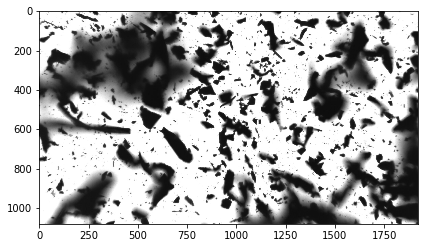

In [19]:
import os 
import skimage 
from skimage import io 
from skimage import color
file = os.path.join(skimage.data_dir, r'C:\Users\guilherme220044\OneDrive - CNPEM - Centro Nacional de Pesquisa em Energia e Materiais\Documentos\app_medir_tamanho_particula\image.png') 
  
  
image = io.imread(file) 
imgGray = color.rgb2gray(image)
io.imshow(imgGray) 

io.show() 

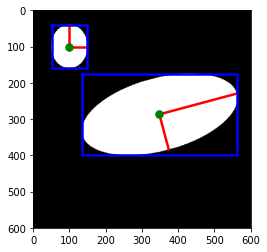

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length'))

In [4]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length
0,100.000000,100.000000,0.000000,119.807049,99.823995
1,286.914167,348.412995,-1.308966,440.015503,199.918850


In [98]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

image = io.imread(file) 
img= color.rgb2gray(image)
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 100)
mask = morphology.remove_small_holes(mask, 100)
image2 = np.invert(mask)
labels = measure.label(image2)
fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, image2)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)

c:\Users\guilherme220044\OneDrive - CNPEM - Centro Nacional de Pesquisa em Energia e Materiais\Documentos\app_medir_tamanho_particula\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning:

Low image data range; displaying image with stretched contrast.



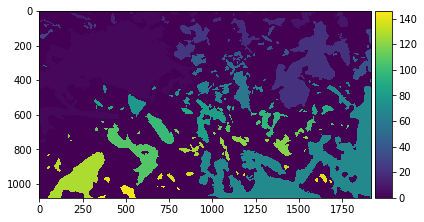

In [96]:
image = io.imread(file) 
img= color.rgb2gray(image)
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 100)
mask = morphology.remove_small_holes(mask, 100)
image2 = np.invert(mask)
labels = measure.label(image2)
fig = io.imshow(labels)

c:\Users\guilherme220044\OneDrive - CNPEM - Centro Nacional de Pesquisa em Energia e Materiais\Documentos\app_medir_tamanho_particula\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning:

Low image data range; displaying image with stretched contrast.



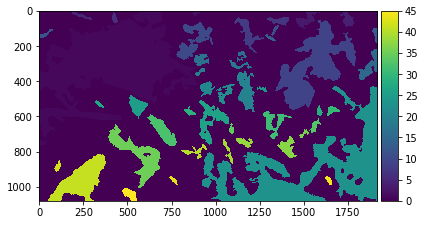

In [92]:
fig = io.imshow(labels)